Chapter 03

# 离群值，多元
Book_6《数据有道》 | 鸢尾花书：从加减乘除到机器学习

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd  
import seaborn as sns 
from sklearn.datasets import load_iris

In [2]:
iris = load_iris()
# A copy from Sklearn

X = iris.data
y = iris.target

feature_names = ['Sepal length, $X_1$','Sepal width, $X_2$',
                 'Petal length, $X_3$','Petal width, $X_4$']

# Convert X array to dataframe
X_df = pd.DataFrame(X, columns=feature_names)

xx, yy = np.meshgrid(np.linspace(4, 8, 50), np.linspace(1, 5, 50))

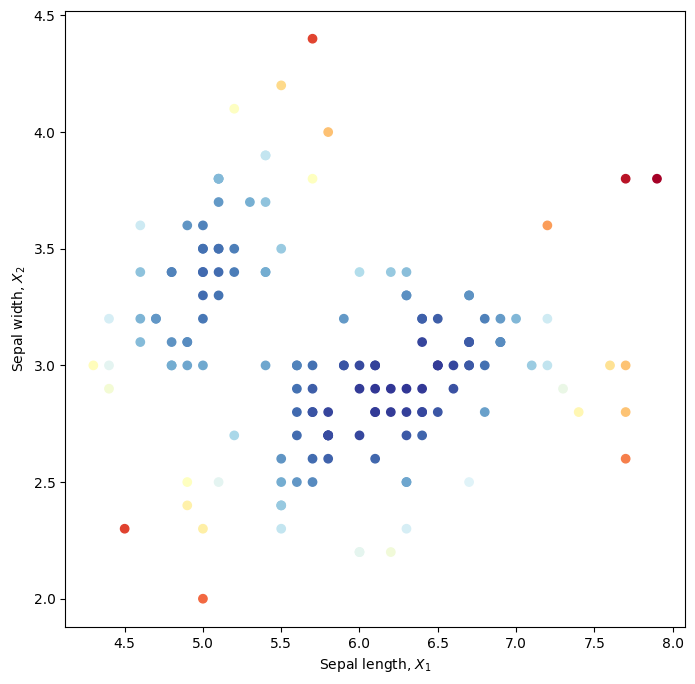

In [3]:
from sklearn.neighbors import KernelDensity

kde = KernelDensity(bandwidth=0.3)
kde.fit(X_df.values[:,:2])
pred = kde.score_samples(X_df.values[:,:2])

pred_1_0 = (pred > np.percentile(pred, 10)).astype(int)

dec = kde.score_samples(np.c_[xx.ravel(), yy.ravel()])

dens = kde.score_samples(X_df.values[:,:2])

plt.figure(figsize=(8,8))
plt.scatter(X_df.values[:,0], X_df.values[:,1], c = dens, cmap='RdYlBu')
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])

X_df['pred_1_0'] = pred_1_0

Text(0, 0.5, 'Sepal width, $X_2$')

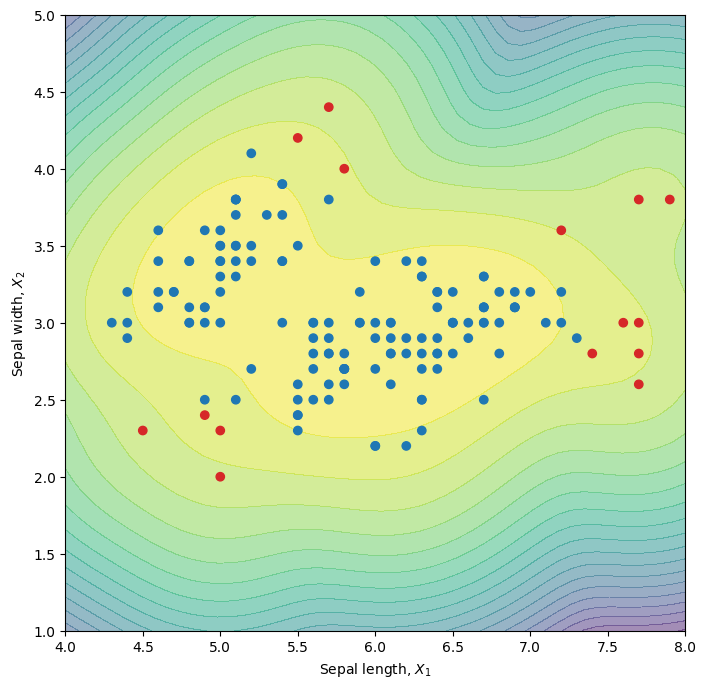

In [4]:
plt.figure(figsize=(8,8))

colors = {1:'tab:blue', 0:'tab:red'}
plt.contourf(xx, yy, dec.reshape(xx.shape), alpha=.5, levels = 20)
plt.scatter(X_df.values[:,0], X_df.values[:,1], 
            c=X_df['pred_1_0'].map(colors))

plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])

#%%

C:\Users\james\AppData\Local\Temp\ipykernel_13716\2080159216.py:12: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  pred = oneclass.predict(X_train).astype(np.int)


Text(0, 0.5, 'Sepal width, $X_2$')

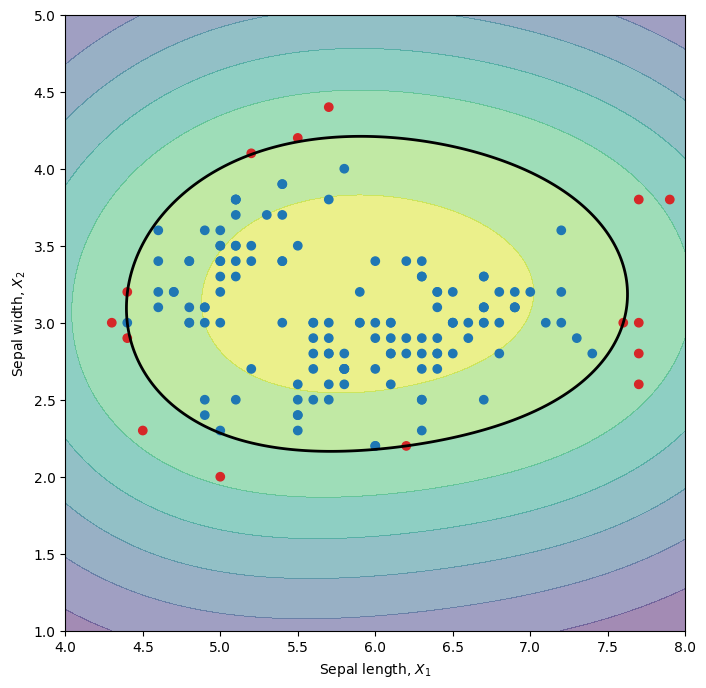

In [5]:
xx, yy = np.meshgrid(np.linspace(4, 8, 200), np.linspace(1, 5, 200))

#%% SVM

from sklearn.svm import OneClassSVM

# scaler = StandardScaler()
X_train = X_df.values[:,:2]

oneclass = OneClassSVM(nu=.1).fit(X_train)

pred = oneclass.predict(X_train).astype(np.int)

X_df['pred_1_minus_1'] = pred

dec = oneclass.decision_function(np.c_[xx.ravel(), yy.ravel()])

plt.figure(figsize=(8,8))

colors = {1:'tab:blue', -1:'tab:red'}
plt.contourf(xx, yy, dec.reshape(xx.shape), alpha=.5)
plt.contour(xx, yy, dec.reshape(xx.shape), levels=[0], linewidths=2, colors="black")

plt.scatter(X_df.values[:,0], X_df.values[:,1], c=X_df['pred_1_minus_1'].map(colors))

plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])

C:\Users\james\AppData\Local\Temp\ipykernel_13716\2354666470.py:6: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  pred = iso.predict(X_train).astype(np.int)


Text(0, 0.5, 'Sepal width, $X_2$')

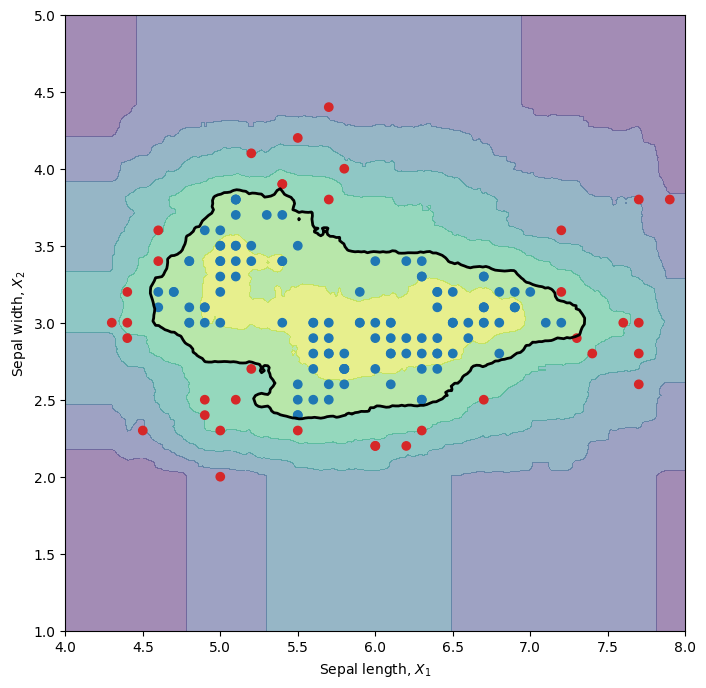

In [6]:
#%% IsolationForest

from sklearn.ensemble import IsolationForest
iso = IsolationForest().fit(X_train)

pred = iso.predict(X_train).astype(np.int)

X_df['pred_1_minus_1'] = pred

dec = iso.decision_function(np.c_[xx.ravel(), yy.ravel()])

plt.figure(figsize=(8,8))

colors = {1:'tab:blue', -1:'tab:red'}
plt.contourf(xx, yy, dec.reshape(xx.shape), alpha=.5)
plt.contour(xx, yy, dec.reshape(xx.shape), levels=[0], linewidths=2, colors="black")

plt.scatter(X_df.values[:,0], X_df.values[:,1], c=X_df['pred_1_minus_1'].map(colors))

plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])